# The Data

In [1]:
import pandas as pd

df_ks = pd.read_csv('ks-projects-201801.csv', index_col='ID')
df_ks

name  \
ID                                                              
1000002330                    The Songs of Adelaide & Abullah   
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
1000004038                                     Where is Hank?   
1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
1000011046  Community Film Project: The Art of Neighborhoo...   
...                                                       ...   
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)   
999977640                                           The Tribe   
999986353   Walls of Remedy- New lesbian Romantic Comedy f...   
999987933                            BioDefense Education Kit   
999988282                   Nou Renmen Ayiti!  We Love Haiti!   

                   category main_category currency    deadline     goal  \
ID                                                                        
1000002330           Poetry    Publishing      GBP  2015-10-09   1000.0   
1000003930   Narrative Film  Film & Video      USD  2017-11-01  30000.0   
1000004038   Narrative Film  Film & Video      USD  2013-02-26  45000.0   
1000007540            Music         Music      USD  2012-04-16   5000.0   
1000011046     Film & Video  Film & Video      USD  2015-08-29  19500.0   
...                     ...           ...      ...         ...      ...   
999976400       Documentary  Film & Video      USD  2014-10-17  50000.0   
999977640    Narrative Film  Film & Video      USD  2011-07-19   1500.0   
999986353    Narrative Film  Film & Video      USD  2010-08-16  15000.0   
999987933        Technology    Technology      USD  2016-02-13  15000.0   
999988282   Performance Art           Art      USD  2011-08-16   2000.0   

                       launched  pledged     state  backers country  \
ID                                                                    
1000002330  2015-08-11 12:12:28      0.0    failed        0      GB   
1000003930  2017-09-02 04:43:57   2421.0    failed       15      US   
1000004038  2013-01-12 00:20:50    220.0    failed        3      US   
1000007540  2012-03-17 03:24:11      1.0    failed        1      US   
1000011046  2015-07-04 08:35:03   1283.0  canceled       14      US   
...                         ...      ...       ...      ...     ...   
999976400   2014-09-17 02:35:30     25.0  canceled        1      US   
999977640   2011-06-22 03:35:14    155.0    failed        5      US   
999986353   2010-07-01 19:40:30     20.0    failed        1      US   
999987933   2016-01-13 18:13:53    200.0    failed        6      US   
999988282   2011-07-19 09:07:47    524.0    failed       17      US   

            usd pledged  usd_pledged_real  usd_goal_real  
ID                                                        
1000002330          0.0               0.0        1533.95  
1000003930        100.0            2421.0       30000.00  
1000004038        220.0             220.0       45000.00  
1000007540          1.0               1.0        5000.00  
1000011046       1283.0            1283.0       19500.00  
...                 ...               ...            ...  
999976400          25.0              25.0       50000.00  
999977640         155.0             155.0        1500.00  
999986353          20.0              20.0       15000.00  
999987933         200.0             200.0       15000.00  
999988282         524.0             524.0        2000.00  

[378661 rows x 14 columns]

# Number of Countries That Participate on KickStarter

In [2]:
df_ks.country.nunique()

23

# Number of Kickstarters Under Each Country

In [3]:
df_kscountry = df_ks['country'].value_counts().rename_axis('Country').reset_index(name='Count')
df_kscountry

Country   Count
0       US  292627
1       GB   33672
2       CA   14756
3       AU    7839
4       DE    4171
5     N,0"    3797
6       FR    2939
7       IT    2878
8       NL    2868
9       ES    2276
10      SE    1757
11      MX    1752
12      NZ    1447
13      DK    1113
14      IE     811
15      CH     761
16      NO     708
17      HK     618
18      BE     617
19      AT     597
20      SG     555
21      LU      62
22      JP      40

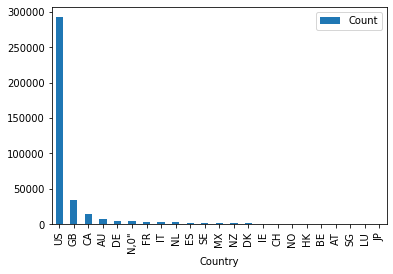

In [4]:
import matplotlib.pyplot as plt
kscountryPlot = df_kscountry.plot.bar('Country','Count')

# Backers vs Pledged

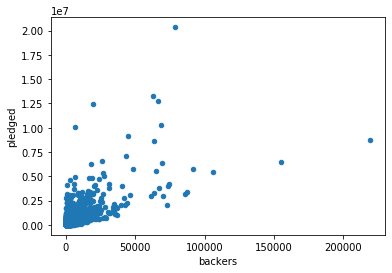

In [5]:
ksBackerPlot = df_ks.plot.scatter('backers','pledged')

# Analyzing the 'State' of KickStarters

In [6]:
df_ks[['name','state']]

name     state
ID                                                                     
1000002330                    The Songs of Adelaide & Abullah    failed
1000003930      Greeting From Earth: ZGAC Arts Capsule For ET    failed
1000004038                                     Where is Hank?    failed
1000007540  ToshiCapital Rekordz Needs Help to Complete Album    failed
1000011046  Community Film Project: The Art of Neighborhoo...  canceled
...                                                       ...       ...
999976400   ChknTruk Nationwide Charity Drive 2014 (Canceled)  canceled
999977640                                           The Tribe    failed
999986353   Walls of Remedy- New lesbian Romantic Comedy f...    failed
999987933                            BioDefense Education Kit    failed
999988282                   Nou Renmen Ayiti!  We Love Haiti!    failed

[378661 rows x 2 columns]

### List of unique state types and total number of kickstarters in data

In [7]:
df_ks.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [8]:
df_ks.shape[0]

378661

### Count/occurance of each state type 

In [9]:
df_ks_state_count = df_ks['state'].value_counts().rename_axis('State').reset_index(name='Count')
df_ks_state_count

State   Count
0      failed  197719
1  successful  133956
2    canceled   38779
3   undefined    3562
4        live    2799
5   suspended    1846

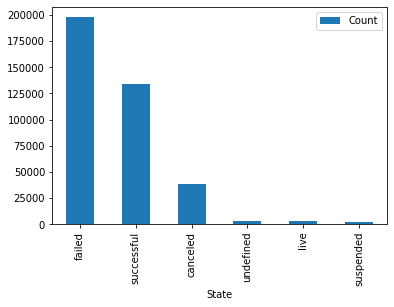

In [16]:
ks_state_count_plot = df_ks_state_count.plot.bar('State','Count')
ks_state_count_plot

#### As we can see, more than half of the kickstarters in our data ended pre-maturely in some manner (Failed, Cancelled).
#### Now lets see if there is any kind of trend between kickstarter categories and their success....